<a href="https://colab.research.google.com/github/OumaimaGhanmi/MassarProject/blob/main/%20Analyse%20et%20Pr%C3%A9diction%20du%20Churn%20des%20Clients%20dans%20une%20Entreprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importation des bibliothèques nécessaires**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Chargement et exploration des données**

Description : Cette étape charge les données depuis un fichier CSV et effectue une première exploration des données. Elle affiche un aperçu des premières lignes du jeu de données, les types de colonnes et des statistiques descriptives pour chaque variable. De plus, les valeurs manquantes sont comptées et affichées pour chaque colonne.



In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn (1).csv')


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print(df.shape)

(7043, 21)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.describe(include='all'))

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

**_Traitement des données manquantes et des doublons**

In [ ]:
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values)


Valeurs manquantes par colonne :
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
duplicate = df[df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df['TotalCharges'].sample(10)

,TotalCharges
4245,1275.85
5390,1200.15
5497,2541.25
4054,1765.95
2310,4464.8
5184,5711.05
2868,2146.5
728,2758.15
2479,4261.2
2921,829.1


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print(df['TotalCharges'].dtypes)

float64


In [ ]:
missing_values = df[df['TotalCharges'].isna()]
print(missing_values.shape)  # Affiche le nombre de lignes avec des NaN dans TotalCharges

(11, 21)


In [ ]:
#df= df.dropna(subset=['TotalCharges'])

In [ ]:
df.shape

(7043, 21)

In [ ]:
missing_values = df[df['TotalCharges'].isna()]
print(missing_values.shape)  # Affiche le nombre de lignes avec des NaN dans TotalCharges

(11, 21)


**Préparation des données**

Description : Cette étape traite les valeurs manquantes dans le jeu de données. Si certaines colonnes sont mal formatées (par exemple, la colonne TotalCharges), elles sont converties au format numérique. Ensuite, les valeurs manquantes dans les colonnes numériques sont remplacées par la médiane, tandis que celles des colonnes catégoriques sont remplacées par la modalité la plus fréquente.

In [ ]:

if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nTypes de données après conversion :")
print(df.dtypes)

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

missing_values_after = df.isnull().sum()
print("\nValeurs manquantes après traitement :")
print(missing_values_after)



Types de données après conversion :
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Valeurs manquantes après traitement :
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovie

**Visualisation des distributions des variables**


Description : Cette étape affiche des histogrammes pour visualiser les distributions des variables numériques, et des diagrammes en barres pour les variables catégoriques, en prenant en compte la variable cible Churn.


Visualisation des distributions des variables numériques...


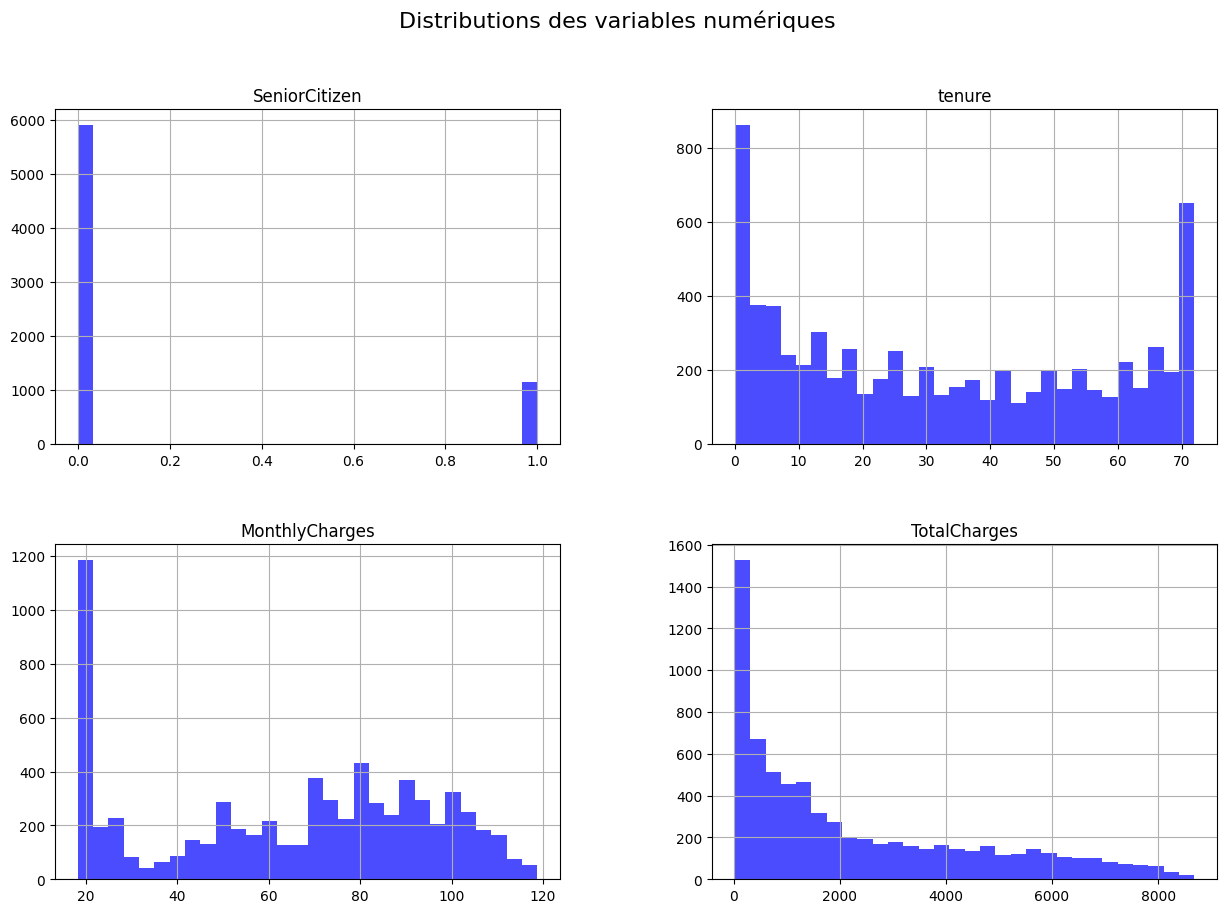

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

print("\nVisualisation des distributions des variables numériques...")
df[numerical_columns].hist(bins=30, figsize=(15, 10), color='blue', alpha=0.7)
plt.suptitle('Distributions des variables numériques', size=16)
plt.show()




Visualisation des variables catégoriques...


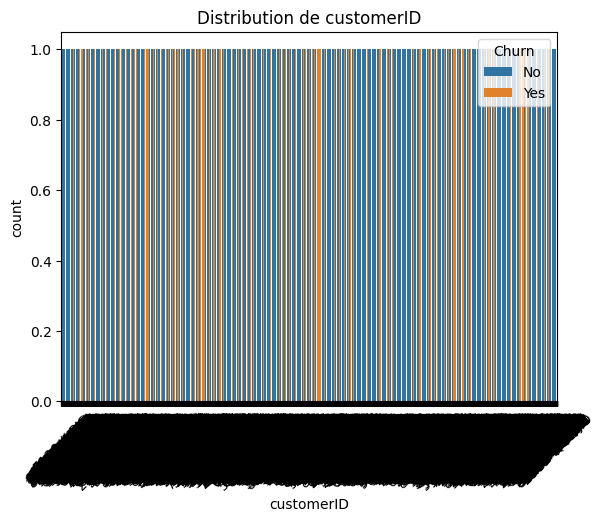

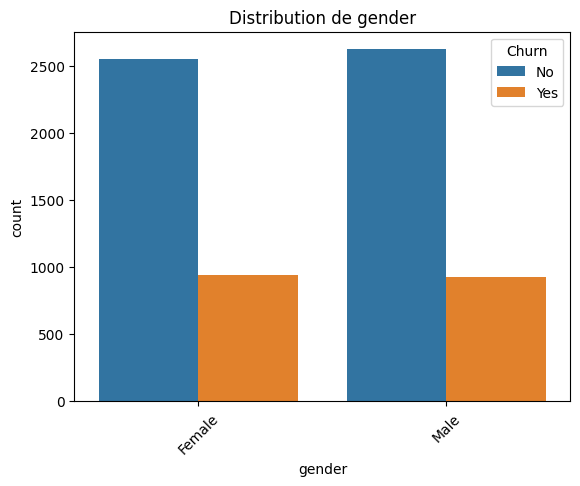

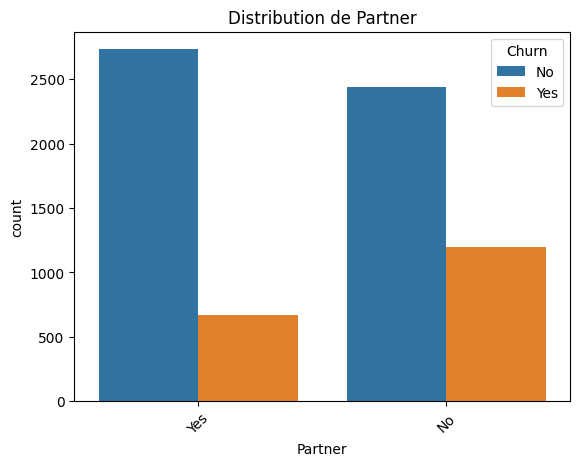

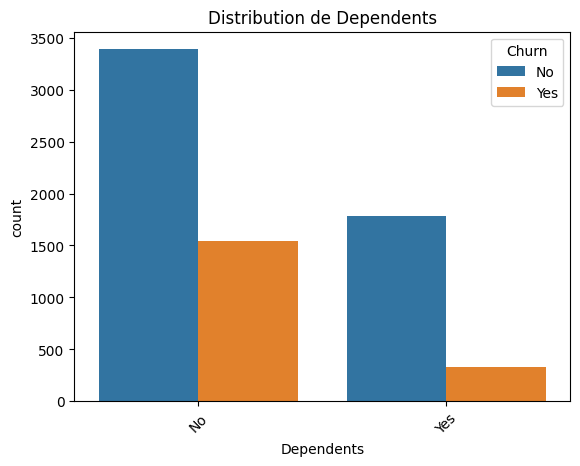

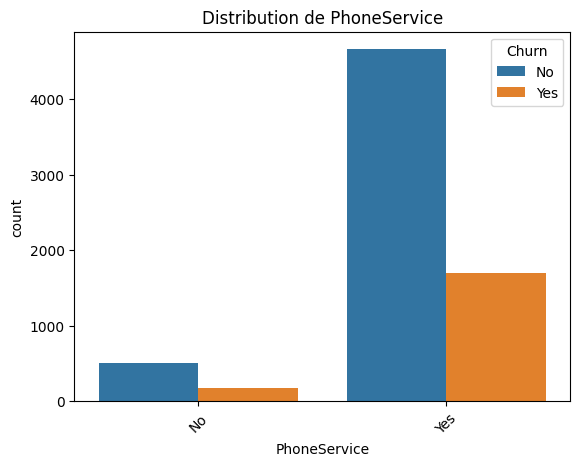

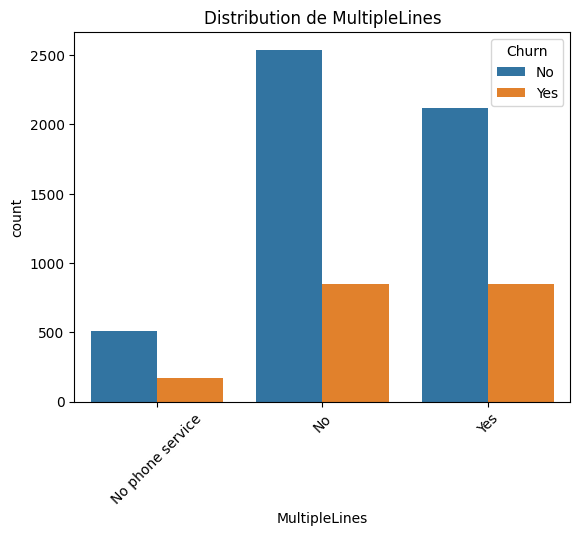

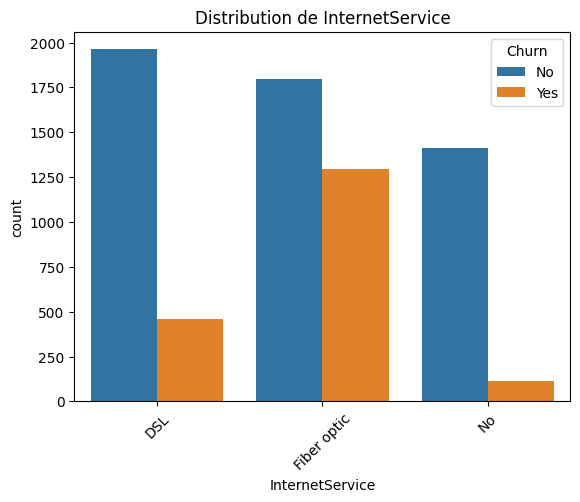

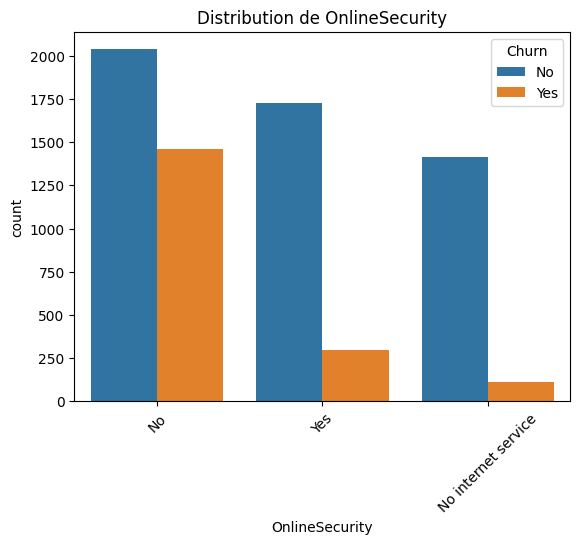

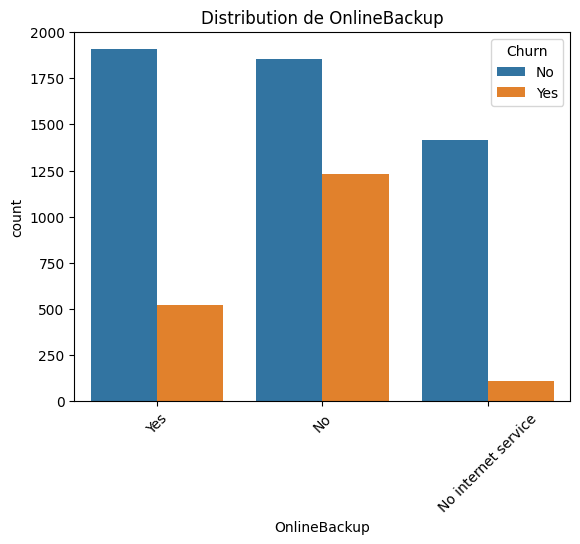

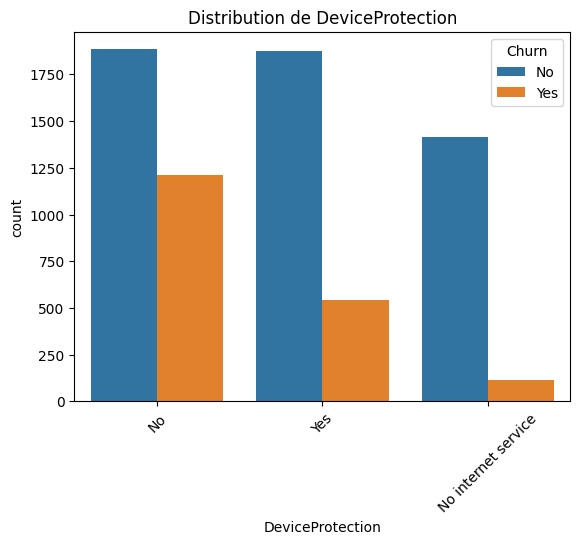

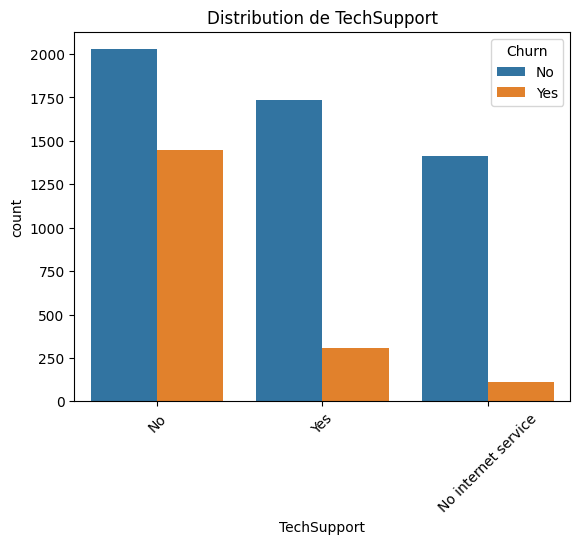

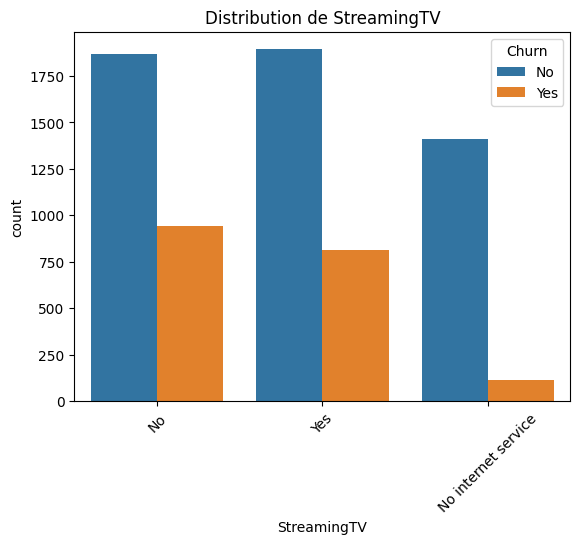

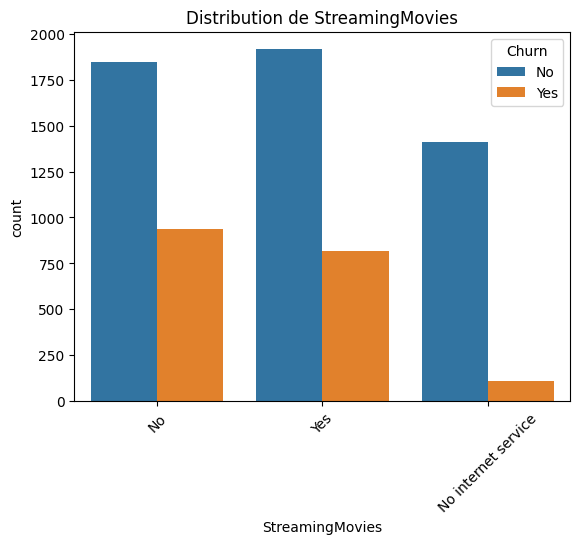

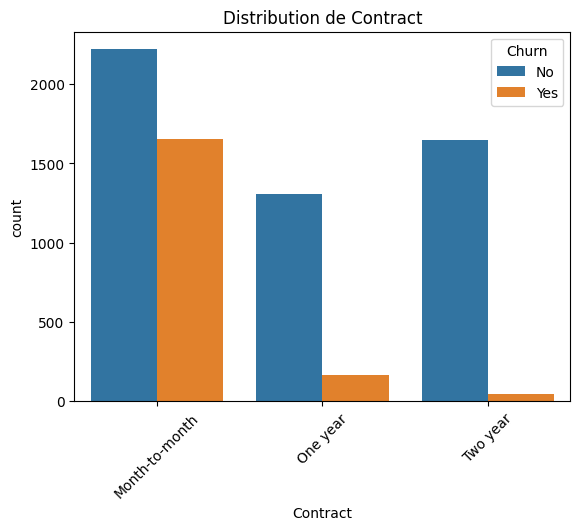

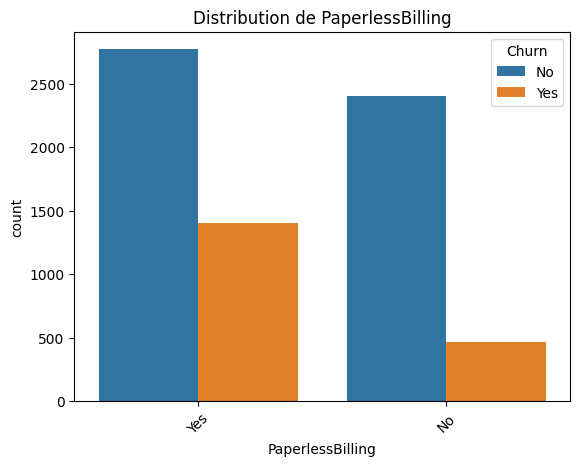

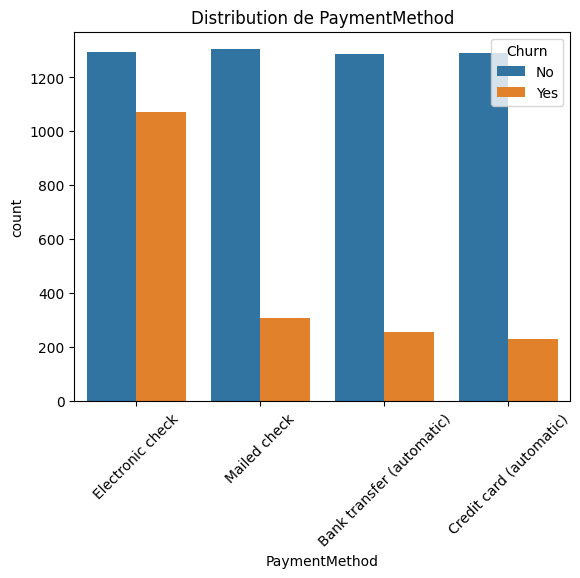

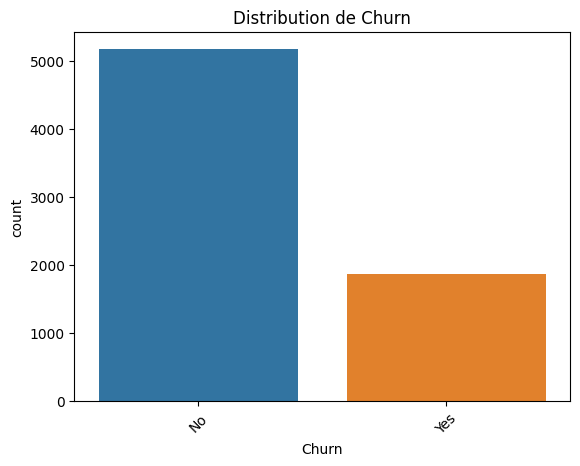

In [ ]:
categorical_columns = [
    'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]
print("\nVisualisation des variables catégoriques...")
for column in categorical_columns:
    if 'Churn' in df.columns:
        sns.countplot(data=df, x=column, hue='Churn' )
        plt.title(f'Distribution de {column}')
        plt.xticks(rotation=45)
        plt.show()

**Encodage des variables catégorielles**

In [ ]:
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

**_Analyse de la relation entre les variables et la cible**


Relation entre les variables numériques et la cible...


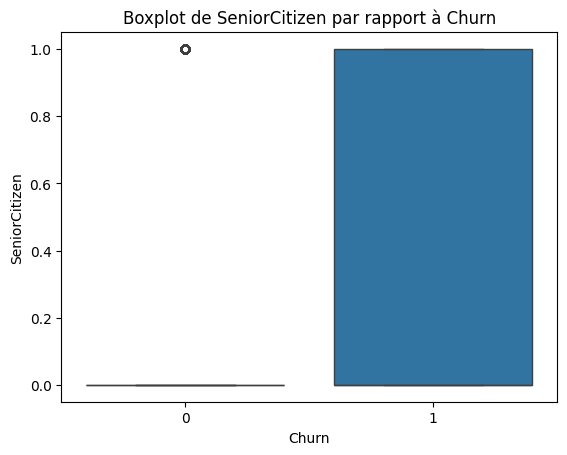

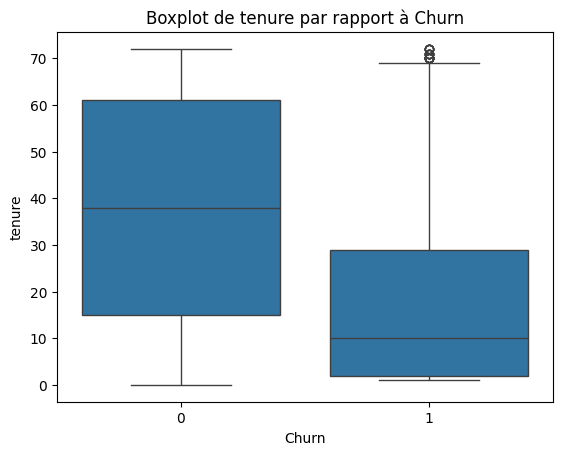

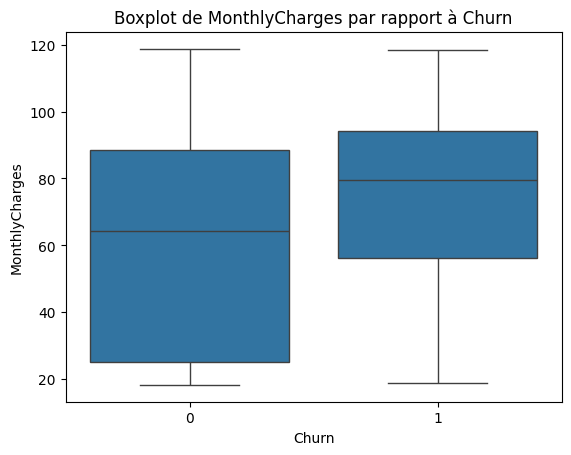

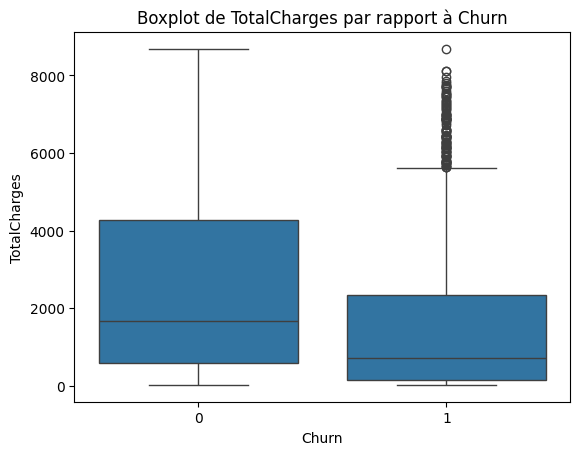


Relation entre les variables catégoriques et la cible...


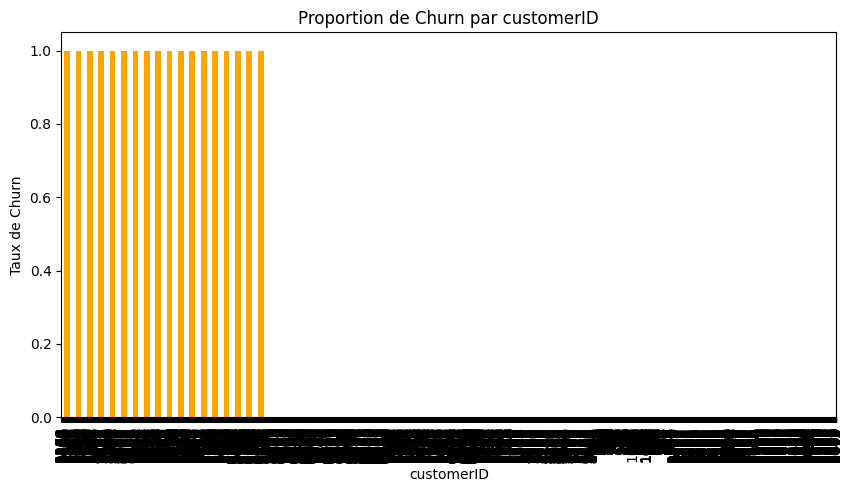

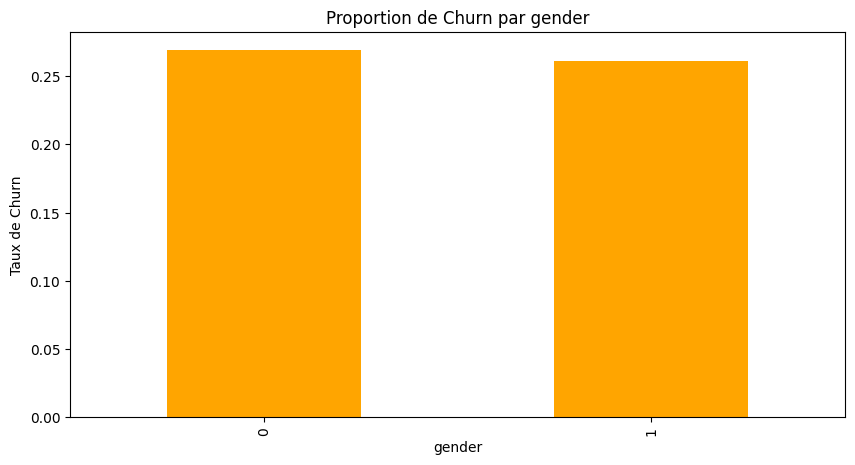

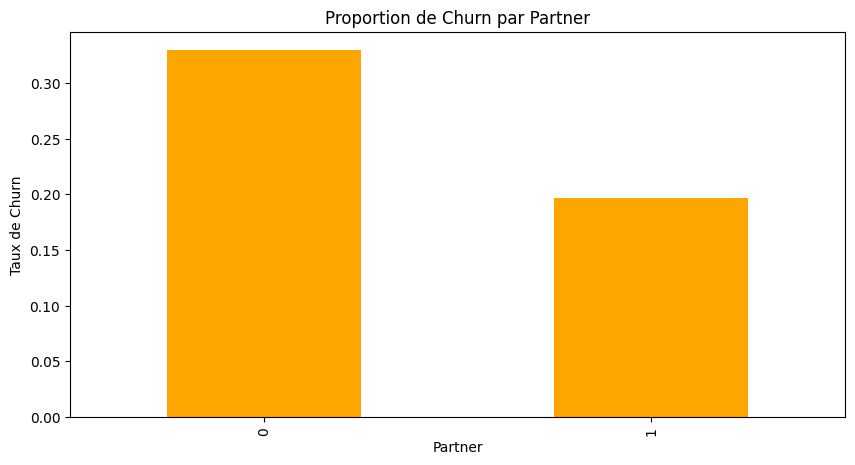

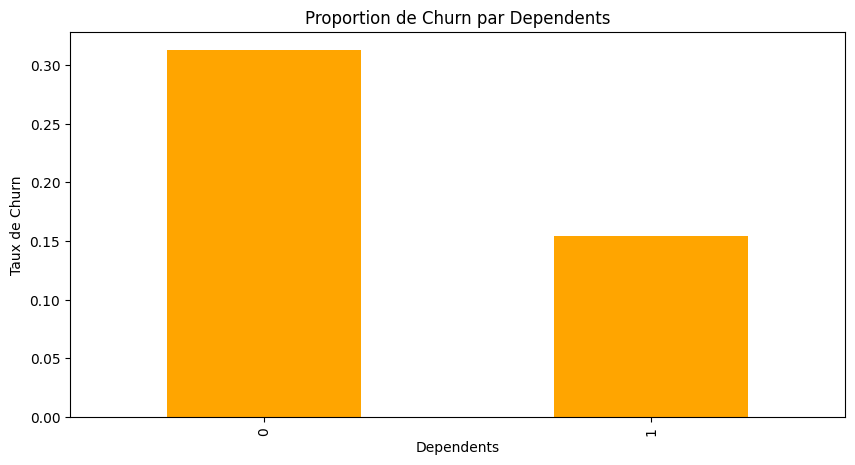

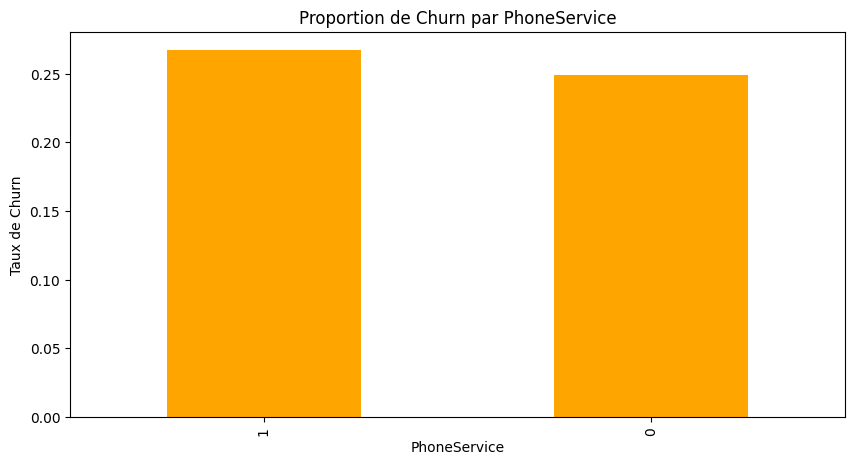

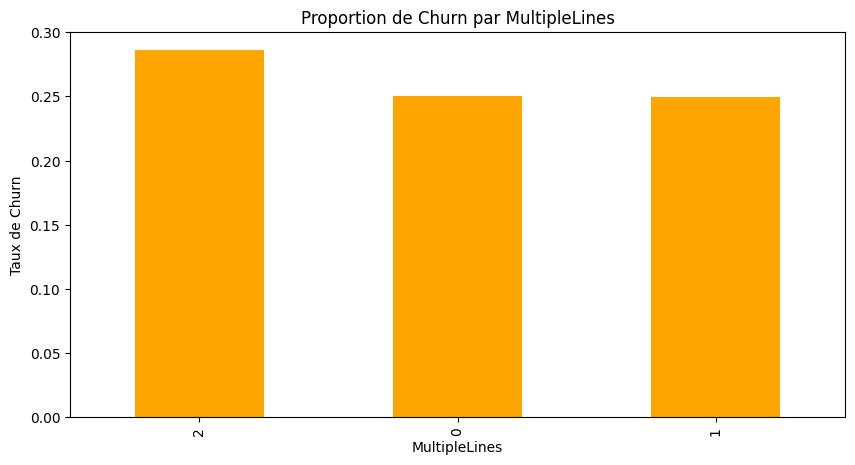

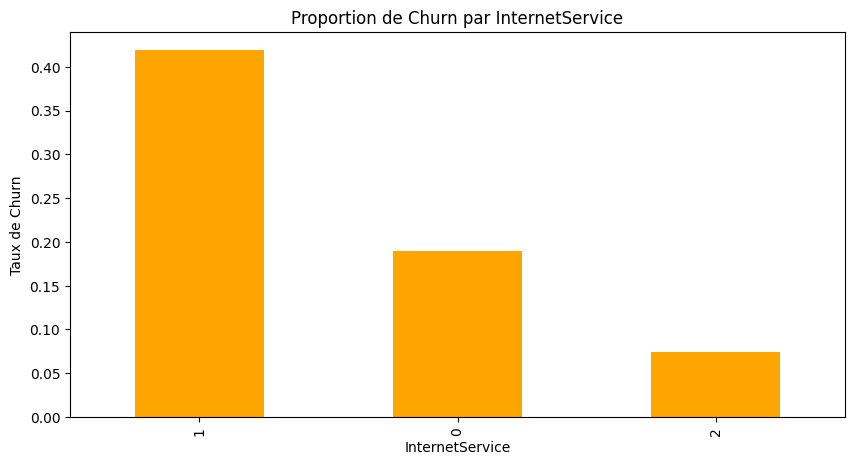

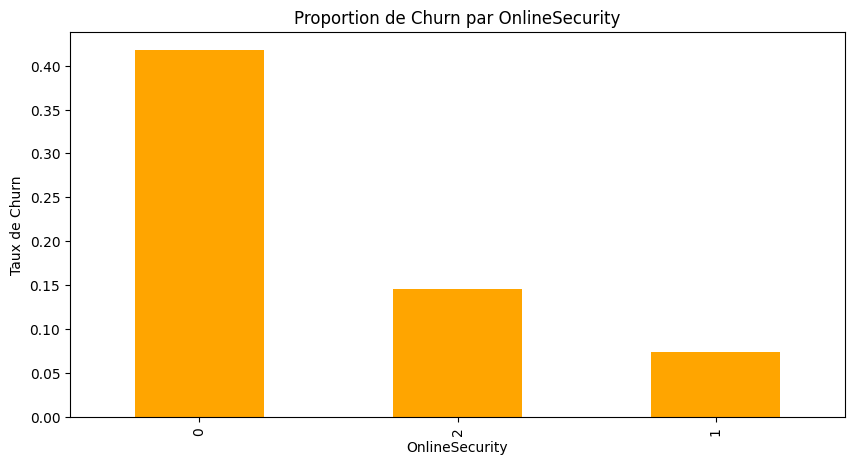

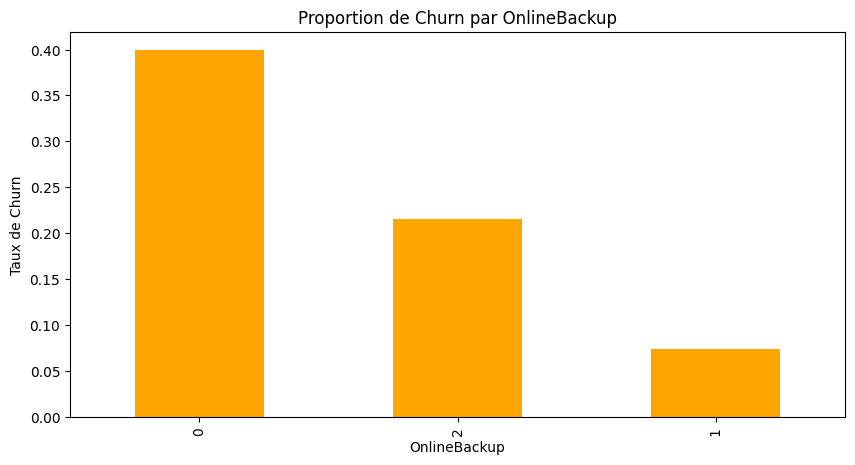

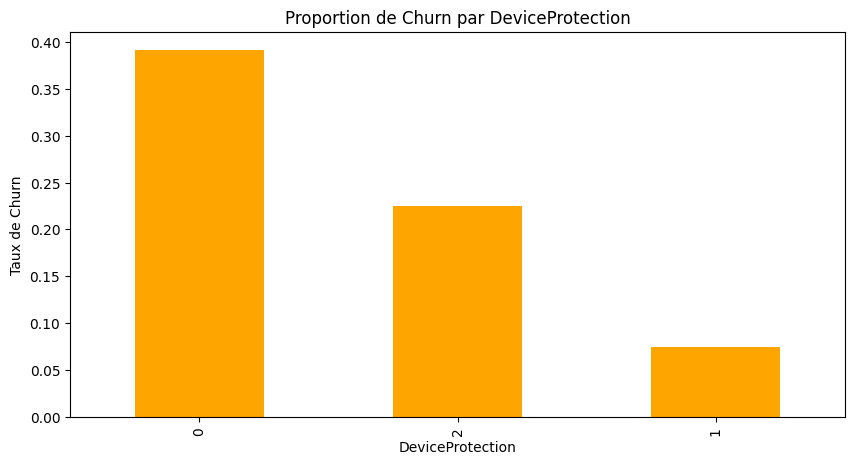

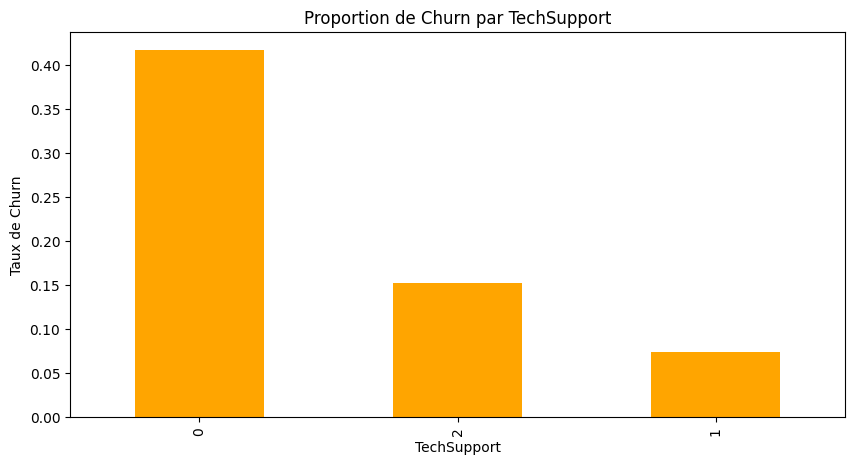

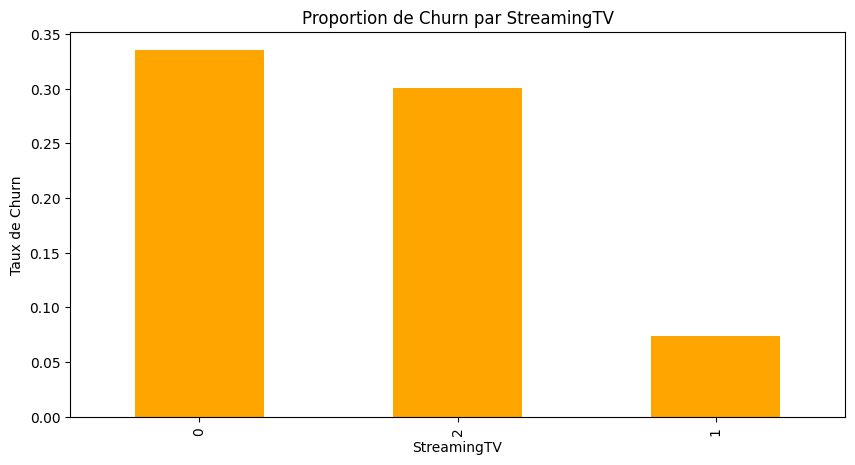

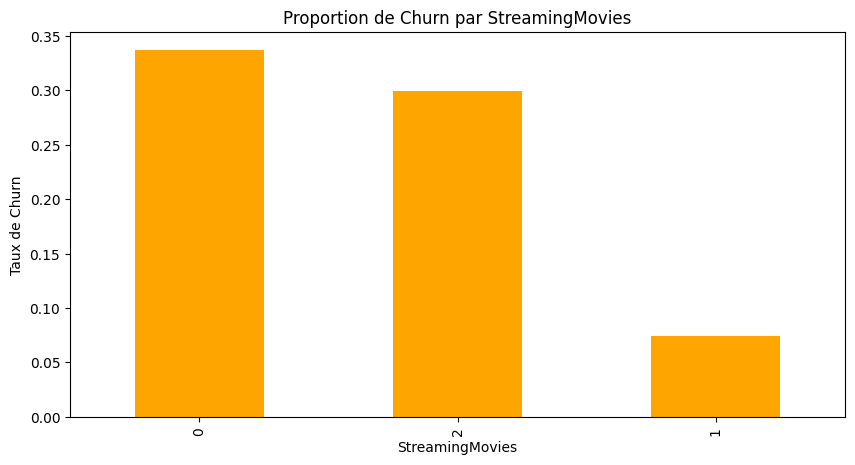

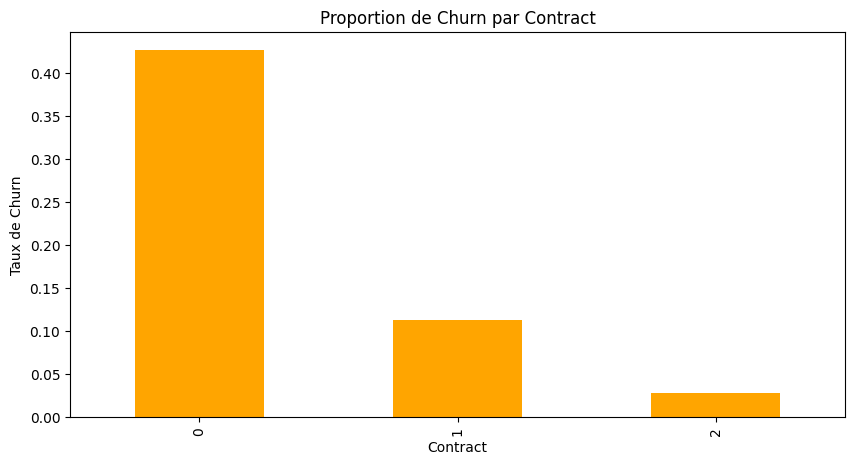

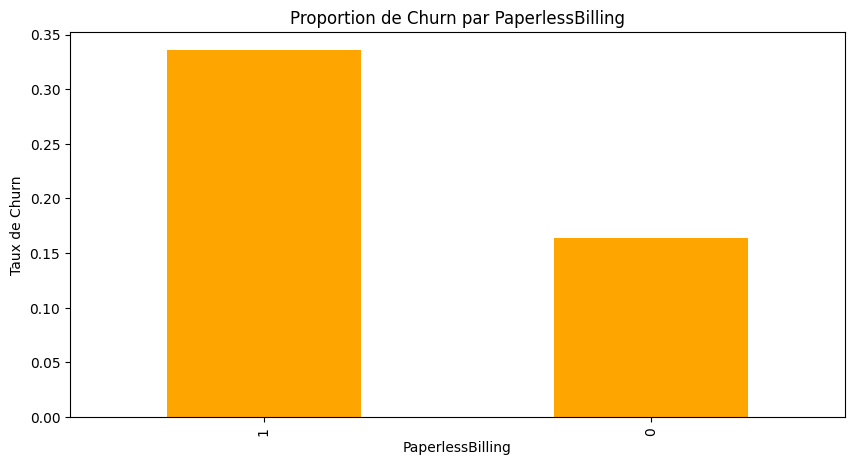

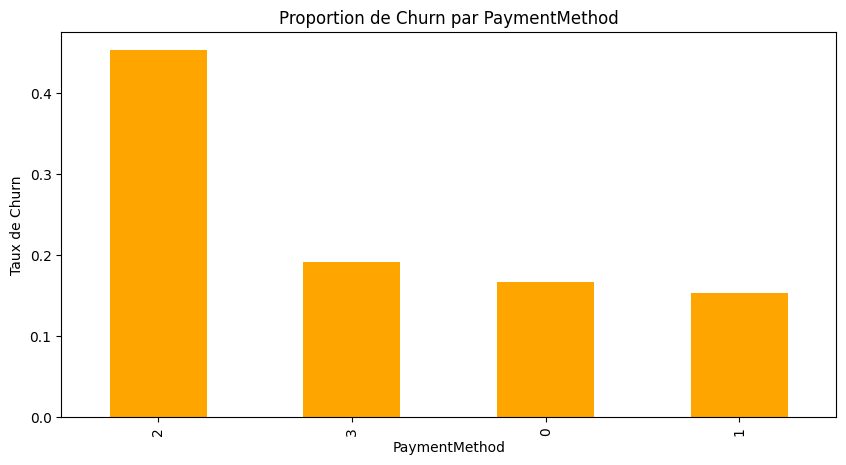

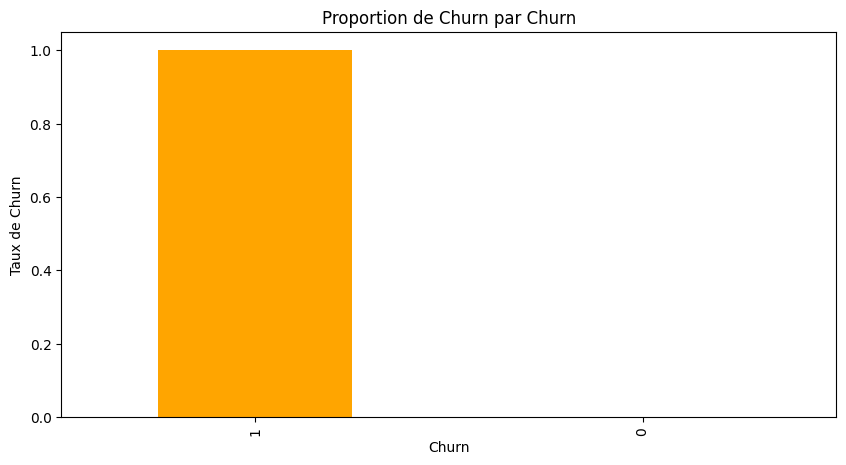

In [ ]:
print("\nRelation entre les variables numériques et la cible...")
for column in numerical_columns:
    if 'Churn' in df.columns:
        sns.boxplot(x='Churn', y=column, data=df)
        plt.title(f'Boxplot de {column} par rapport à Churn')
        plt.show()

print("\nRelation entre les variables catégoriques et la cible...")
for column in categorical_columns:
    if 'Churn' in df.columns:
        churn_rate = df.groupby(column)['Churn'].mean()
        churn_rate.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='orange')
        plt.title(f'Proportion de Churn par {column}')
        plt.ylabel('Taux de Churn')
        plt.show()

 **Analyse de la corrélation entre les variables**

 Description : Cette étape encode les variables catégoriques pour les rendre exploitables dans un modèle. Ensuite, elle calcule et affiche la matrice de corrélation entre les variables pour détecter les relations importantes, notamment avec la cible Churn






Préparation des données pour l'analyse de corrélation...

Analyse de la corrélation entre les variables...


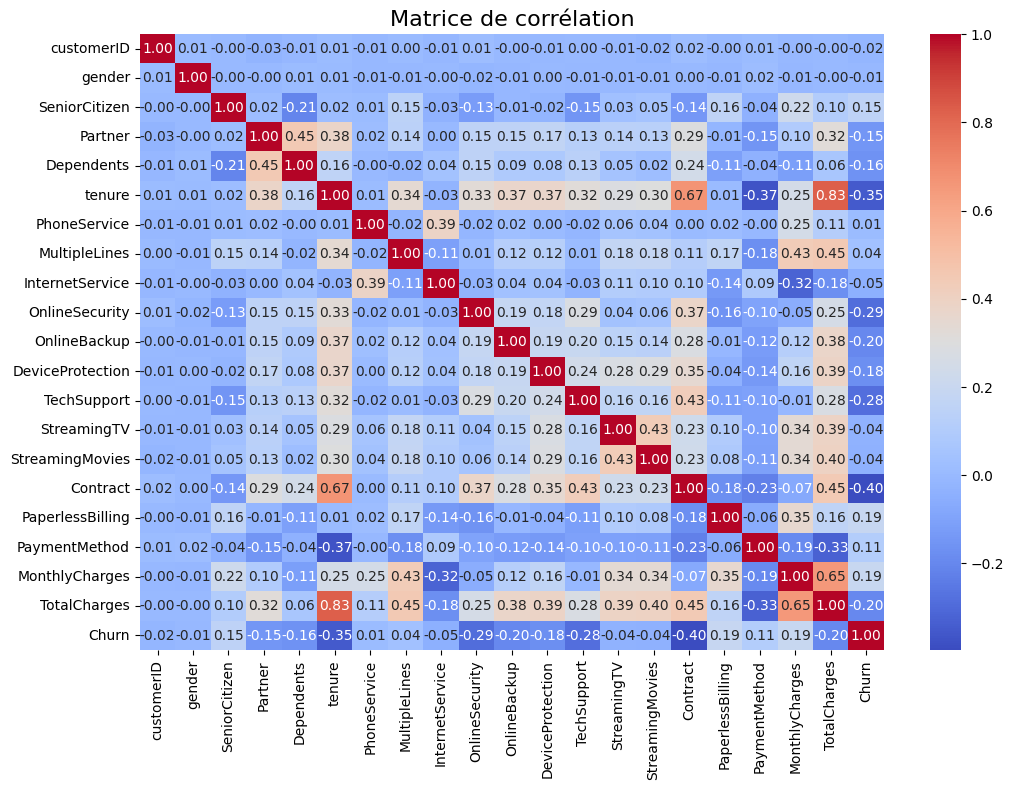


Corrélation avec la cible (Churn) :
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199037
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [ ]:
print("\nPréparation des données pour l'analyse de corrélation...")


for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nAnalyse de la corrélation entre les variables...")
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation', size=16)
plt.show()

if 'Churn' in correlation_matrix.columns:
    correlation_with_target = correlation_matrix['Churn'].sort_values(ascending=False)
    print("\nCorrélation avec la cible (Churn) :")
    print(correlation_with_target)

**Préparation des données pour la modélisation**

Description : Cette étape prépare les données pour l'apprentissage automatique. Elle standardise les variables numériques et sépare le jeu de données en ensembles d'entraînement et de test. L'ensemble de test représente 20% des données

In [ ]:
print(df['Churn'].isnull().sum())
print(df.shape)


0
(7043, 21)


In [ ]:
df = df.dropna(subset=['Churn'])


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Données prêtes pour la modélisation !")

Données prêtes pour la modélisation !


**Entraînement et évaluation du modèle**



Entraînement du modèle Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Prédiction sur l'ensemble de test...

Évaluation du modèle...

Précision du modèle : 0.8169

Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Matrice de confusion :


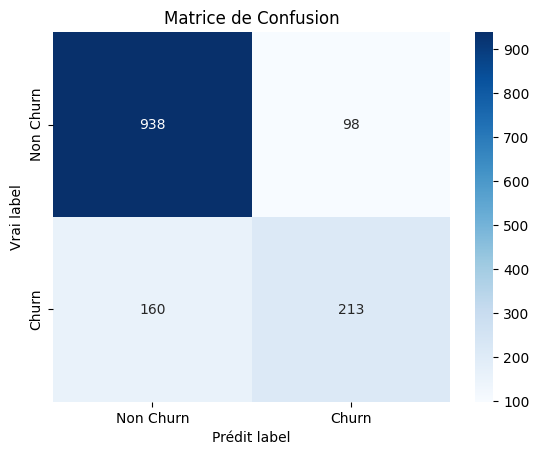

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("\nEntraînement du modèle Logistic Regression...")
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


print("\nPrédiction sur l'ensemble de test...")
y_pred = model.predict(X_test)


print("\nÉvaluation du modèle...")


accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle : {accuracy:.4f}")


print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


print("\nMatrice de confusion :")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Churn', 'Churn'], yticklabels=['Non Churn', 'Churn'])
plt.title('Matrice de Confusion')
plt.ylabel('Vrai label')
plt.xlabel('Prédit label')
plt.show()



Entraînement du modèle Decision Tree...

Prédiction sur l'ensemble de test avec Decision Tree...

Évaluation du modèle Decision Tree...

Précision du modèle Decision Tree : 0.7289

Rapport de classification (Decision Tree) :
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409


Matrice de confusion (Decision Tree) :


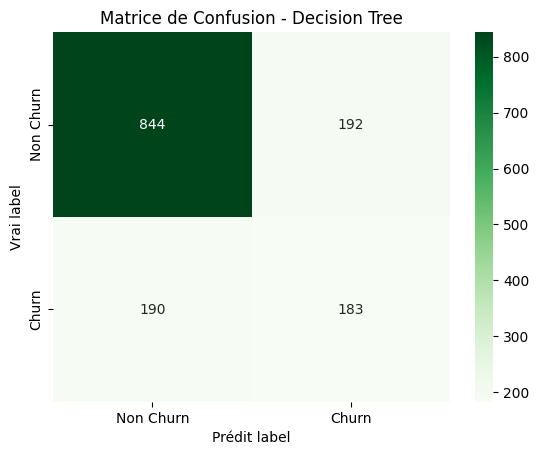

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Arbre de décision
print("\nEntraînement du modèle Decision Tree...")
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

print("\nPrédiction sur l'ensemble de test avec Decision Tree...")
y_pred_tree = decision_tree_model.predict(X_test)

print("\nÉvaluation du modèle Decision Tree...")

# Précision
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"\nPrécision du modèle Decision Tree : {accuracy_tree:.4f}")

# Rapport de classification
print("\nRapport de classification (Decision Tree) :")
print(classification_report(y_test, y_pred_tree))

# Matrice de confusion
print("\nMatrice de confusion (Decision Tree) :")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non Churn', 'Churn'], yticklabels=['Non Churn', 'Churn'])
plt.title('Matrice de Confusion - Decision Tree')
plt.ylabel('Vrai label')
plt.xlabel('Prédit label')
plt.show()


In [ ]:
pip install tpot


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.6 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=529e4fb143ec6d9285b1103b5c059162f376c2e8d2700ee01b13383dc0d6e051
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)

print("\nEntraînement de TPOT...")
tpot.fit(X_train, y_train)

accuracy = tpot.score(X_test, y_test)
print(f"\nPrécision du modèle optimisé par TPOT : {accuracy:.4f}")

tpot.export('tpot_best_pipeline.py')



Entraînement de TPOT...
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.801205041442015

Generation 2 - Current best internal CV score: 0.803335061725671

Generation 3 - Current best internal CV score: 0.803335061725671

Generation 4 - Current best internal CV score: 0.803335061725671

Generation 5 - Current best internal CV score: 0.803866975780968

Best pipeline: GradientBoostingClassifier(ZeroCount(input_matrix), learning_rate=0.1, max_depth=3, max_features=0.05, min_samples_leaf=15, min_samples_split=14, n_estimators=100, subsample=0.25)

Précision du modèle optimisé par TPOT : 0.8034
